### Test area

Populating the interactive namespace from numpy and matplotlib
WebbPSF log messages of level INFO and above will be shown.
WebbPSF log outputs will be directed to the screen.
[webbpsf] Set the following optical configuration:
[webbpsf] camera = IFS, filter = F770, apodizer = CHARSPC, fpm = CHARSPC_F770_BOWTIE, lyotstop = LS30D88


[  poppy] Pysynphot unavailable (or invalid source supplied)!   Assuming flat # of counts versus wavelength.
[  poppy] CAUTION: Just interpolating rather than integrating filter profile, over 1 steps


[  poppy] PSF calc using fov_arcsec = 1.600000, oversample = 4, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: Roman+CGI
[  poppy] Roman Entrance Pupil: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: Roman Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/CHARSPC_SP_256pix.fits.gz
[  poppy] Added pupil plane: CHARSPC
[  poppy] Added pupil plane: DM
[  poppy] CHARSPC_F770_BOWTIE: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/CHARSPC_FPM_25WA90_2x65deg_-_FP1res4_evensamp_D072_F770.fits.gz
[  poppy] Added image plane: CHARSPC_F770_BOWTIE
[  poppy] LS30D88: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/SPC_LS_30D88_256pix.fits.gz
[  poppy] Added pupil plane: LS3

[  poppy] Pysynphot unavailable (or invalid source supplied)!   Assuming flat # of counts versus wavelength.
[  poppy] CAUTION: Just interpolating rather than integrating filter profile, over 1 steps


[  poppy] PSF calc using fov_arcsec = 1.600000, oversample = 4, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: Roman+CGI
[  poppy] Roman Entrance Pupil: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/AFTA_CGI_C5_Pupil_onax_256px_flip.fits
[  poppy] Added pupil plane: Roman Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] CHARSPC: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/CHARSPC_SP_256pix.fits.gz
[  poppy] Added pupil plane: CHARSPC
[  poppy] Added pupil plane: DM
[  poppy] LS30D88: Loaded amplitude transmission from /home/marken/GitHub/webbpsf_data/CGI/optics/SPC_LS_30D88_256pix.fits.gz
[  poppy] Added pupil plane: LS30D88
[  poppy] Initialized OpticalSystem: unnamed system
[  poppy] Added detector with pixelscale=0.025 and oversampling=4: CGI detector
[  poppy] Calculating PSF with 1 wavelengths
[  poppy]  Propagating wavelength = 7.7e-

/home/marken/GitHub/webbpsf/webbpsf/roman.py:890: RuntimeWarning: divide by zero encountered in true_divide
  section = np.abs((newy - yc) / (newx - xc)) < np.arctan(angle)
/home/marken/GitHub/webbpsf/webbpsf/roman.py:890: RuntimeWarning: invalid value encountered in true_divide
  section = np.abs((newy - yc) / (newx - xc)) < np.arctan(angle)


4.540177726737013e-07

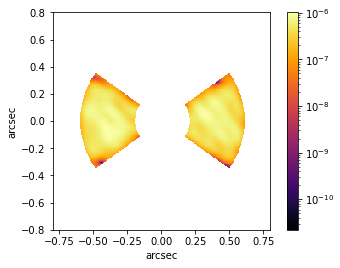

In [1]:
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'

import os
os.environ['WEBBPSF_PATH'] = '/home/marken/GitHub/webbpsf_data'
import webbpsf
from webbpsf import roman
import ipywidgets
from astropy.io import fits

webbpsf.setup_logging()

DM_on = roman.CGI(mode='CHARSPC_F770')
DM_on.dm1.set_actuator(4, 8, 1e-6)
DM_on.dm1.set_actuator(44, 40, 1e-6)

DM_on.raw_contrast()